## Import the metaflow client

In [1]:
from metaflow import Flow, get_metadata
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/Vittorio/Desktop/prophet-metaflow


In [2]:
run = Flow('ProphetFlow').latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('ProphetFlow/1605635541339418')


In [3]:
print("Prophet model generated on %s\n" % str(run.finished_at))
print("Column mapping used is '%s'" % run.data.columns_mapping)
if 'hyperparameters' in run.data:
    print("Hyperparameters used: '%s'" % run.data.hyperparameters)

Prophet model generated on 2020-11-17T17:52:29Z

Column mapping used is '{'Date': 'ds', 'Temp': 'y'}'


In [4]:
# Prepare dataframe for prediction
future = run.data.m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [5]:
# Predict future values
forecast = run.data.m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.528506,11.077932,17.763287
4011,1991-12-28,14.547088,11.091298,17.915261
4012,1991-12-29,14.518543,11.085890,17.922265
4013,1991-12-30,14.721035,10.908313,18.145100
4014,1991-12-31,14.892213,11.433241,18.355369


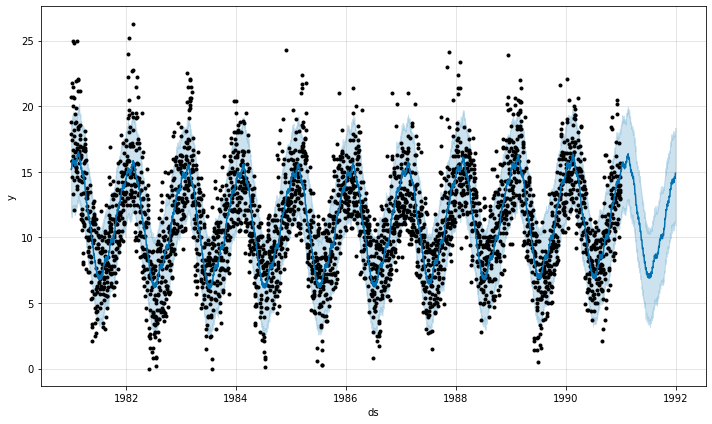

In [6]:
# Display results
fig1 = run.data.m.plot(forecast)

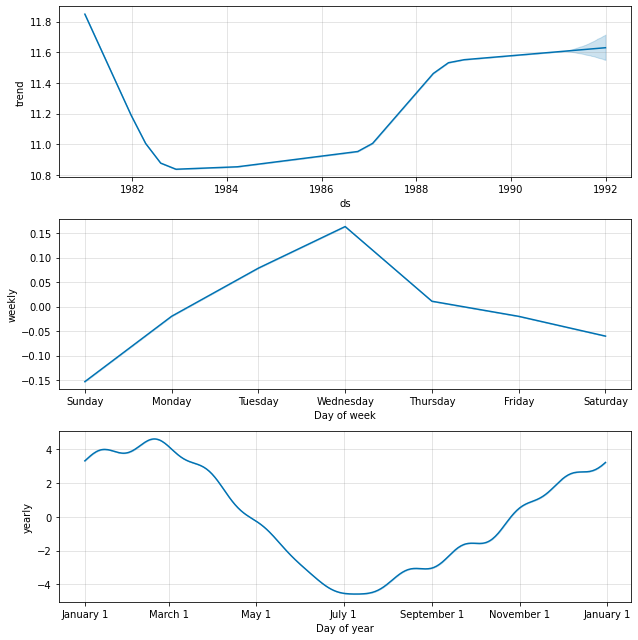

In [7]:
fig2 = run.data.m.plot_components(forecast)